In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [64]:
# setting the figsize
plt.rcParams['figure.figsize'] = (16,12)

In [65]:
df = pd.read_csv("beta_ndvi_rainfall.csv")

In [66]:
df.head(2)

,FID,number,station_nu,station_na,decilat,decilong,slope,ndvi_beta,rain_82,rain_83,...,ndvi_91,ndvi_92,ndvi_93,ndvi_94,ndvi_95,ndvi_96,ndvi_97,ndvi_98,ndvi_99,ndvi_00
0,0,1,50434,Tulihe,50.483,121.683,-0.000070,-0.000070,524.2,511.8,...,0.688,0.488,0.608,0.728,0.688,0.680,0.640,0.592,0.68,0.568
1,1,2,50527,Hailar,49.217,119.750,-0.001151,-0.001151,428.5,301.4,...,0.472,0.392,0.464,0.472,0.456,0.464,0.464,0.440,0.52,0.536


double checking whether both my previous pandas calculations (`df.slope`) as well as the results of the raster calculation (`ndvi_beta`) returned the same values.

In [67]:
check = df.slope == df.ndvi_beta
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.all.html
check.all()

True

Great! Both of them have consistently the same values, which means that my calculations were probably correct. Consequently I can remove one of the two columns.

In [68]:
df.drop('ndvi_beta', axis=1, inplace=True)

In [69]:
df.columns

Index(['FID', 'number', 'station_nu', 'station_na', 'decilat', 'decilong',
       'slope', 'rain_82', 'rain_83', 'rain_84', 'rain_85', 'rain_86',
       'rain_87', 'rain_88', 'rain_89', 'rain_90', 'rain_91', 'rain_92',
       'rain_93', 'rain_94', 'rain_95', 'rain_96', 'rain_97', 'rain_98',
       'rain_99', 'ndvi_82', 'ndvi_83', 'ndvi_84', 'ndvi_85', 'ndvi_86',
       'ndvi_87', 'ndvi_88', 'ndvi_89', 'ndvi_90', 'ndvi_91', 'ndvi_92',
       'ndvi_93', 'ndvi_94', 'ndvi_95', 'ndvi_96', 'ndvi_97', 'ndvi_98',
       'ndvi_99', 'ndvi_00'],
      dtype='object')

In [70]:
rain_cols = ['rain_82', 'rain_83', 'rain_84', 'rain_85', 'rain_86', 'rain_87',
             'rain_88', 'rain_89', 'rain_90', 'rain_91', 'rain_92', 'rain_93',
             'rain_94', 'rain_95', 'rain_96', 'rain_97', 'rain_98', 'rain_99']

In [71]:
ndvi_cols = ['ndvi_82', 'ndvi_83', 'ndvi_84', 'ndvi_85', 'ndvi_86',
       'ndvi_87', 'ndvi_88', 'ndvi_89', 'ndvi_90', 'ndvi_91', 'ndvi_92',
       'ndvi_93', 'ndvi_94', 'ndvi_95', 'ndvi_96', 'ndvi_97', 'ndvi_98',
       'ndvi_99', 'ndvi_00']

In [72]:
precip_hailar = df[df.station_na == 'Hailar'][rain_cols]

In [73]:
precip_hailar

,rain_82,rain_83,rain_84,rain_85,rain_86,rain_87,rain_88,rain_89,rain_90,rain_91,rain_92,rain_93,rain_94,rain_95,rain_96,rain_97,rain_98,rain_99
1,428.5,301.4,522.7,343.5,119.6,222.0,410.3,417.0,521.5,319.2,301.9,414.8,282.8,248.3,398.6,346.4,401.6,241.9


In [74]:
ndvi_hailar = df[df.station_na == 'Hailar'][ndvi_cols]

In [75]:
ndvi_hailar

,ndvi_82,ndvi_83,ndvi_84,ndvi_85,ndvi_86,ndvi_87,ndvi_88,ndvi_89,ndvi_90,ndvi_91,ndvi_92,ndvi_93,ndvi_94,ndvi_95,ndvi_96,ndvi_97,ndvi_98,ndvi_99,ndvi_00
1,0.52,0.496,0.528,0.472,0.472,0.448,0.56,0.464,0.448,0.472,0.392,0.464,0.472,0.456,0.464,0.464,0.44,0.52,0.536


In [76]:
len(precip_hailar.columns)

18

In [77]:
len(ndvi_hailar.columns)

19

In order to plot the values against each other they need to have the same length (=amount of values). Since NDVI extends one year further than Precipitation, I will remove the final value of `ndvi`.

In [78]:
ndvi_hailar.pop('ndvi_00')

1    0.536
Name: ndvi_00, dtype: float64

In [79]:
len(ndvi_hailar.columns)

18

In [80]:
df_hailar = pd.DataFrame({'NDVI': ndvi_hailar.values[0], 'Precipitation': precip_hailar.values[0]})

In [81]:
model = sm.formula.ols(formula='NDVI ~ Precipitation', data=df_hailar)
res = model.fit()

In [82]:
res.summary()

/Users/martin/Documents/GIS/RS/12_Time_Series/stats_calcs/.env/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7050
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.413
Time:                        11:20:38   Log-Likelihood:                 34.068
No. Observations:                  18   AIC:                            -64.14
Df Residuals:                      16   BIC:                            -62.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4489      0.033     13.794      0.000       0.380       0.518
Precipitation  7.564e-05   9.01e-05      0.840      0.413      -0.000       0.000
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.097
Skew:                           0.166   Prob(JB):                        0.953
Kurtosis:                       3.137   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
r2 = res.rsquared

In [84]:
res.params

Intercept        0.448882
Precipitation    0.000076
dtype: float64

In [85]:
d = res.params[0]
k = res.params[1]

Text(150, 0.55, 'Trend Line equation: y = 0.000076x + 0.448882\n\nRMSE: 0.042202%')

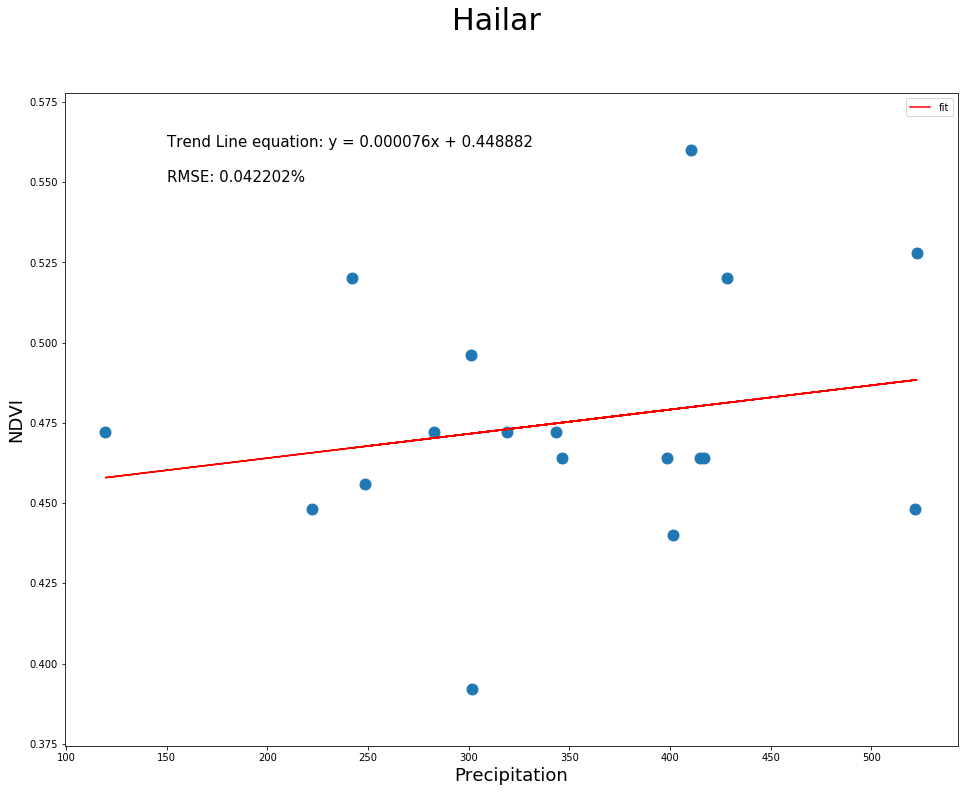

In [86]:
fig, ax = plt.subplots()
plt.scatter(x=df_hailar['Precipitation'], y=df_hailar['NDVI'], s=120)

df_hailar.assign(fit=res.fittedvalues).plot(x='Precipitation', y='fit', ax=ax, color='red')

# fixing up the figure for easier reading

plt.xlabel('Precipitation', fontsize=18)
plt.ylabel('NDVI', fontsize=18)
fig.suptitle('Hailar', fontsize=30)
# interesting that the x and y are related to the plot values...
ax.text(x=150, y=0.55, s="Trend Line equation: y = {0:f}x + {1:f}\n\nRMSE: {2:f}%".format(k, d, r2), fontsize=15)

#plt.savefig("hailar.png")

# Generalize these actions with two functions

In [87]:
def create_station_df(df, station_name):
    rain_cols = ['rain_82', 'rain_83', 'rain_84', 'rain_85', 'rain_86', 'rain_87',
             'rain_88', 'rain_89', 'rain_90', 'rain_91', 'rain_92', 'rain_93',
             'rain_94', 'rain_95', 'rain_96', 'rain_97', 'rain_98', 'rain_99']
    # 'ndvi_00' excluded from used NDVI data, because there is no corresponding value for rainfall
    ndvi_cols = ['ndvi_82', 'ndvi_83', 'ndvi_84', 'ndvi_85', 'ndvi_86',
       'ndvi_87', 'ndvi_88', 'ndvi_89', 'ndvi_90', 'ndvi_91', 'ndvi_92',
       'ndvi_93', 'ndvi_94', 'ndvi_95', 'ndvi_96', 'ndvi_97', 'ndvi_98',
       'ndvi_99']
    precip = df[df.station_na == station_name][rain_cols]
    ndvi = df[df.station_na == station_name][ndvi_cols]
    # accessing the actual values of the Series through values[0]
    station_df = pd.DataFrame({'NDVI': ndvi.values[0], 'Precipitation': precip.values[0]})
    return station_df

def scatter_ndvi_precip(station_df, station_name):
    # creating the OLS regression fit
    model = sm.formula.ols(formula='NDVI ~ Precipitation', data=station_df)
    res = model.fit()
    r2, d, k = res.rsquared, res.params[0], res.params[1]
    
    fig, ax = plt.subplots()
    plt.scatter(x=station_df['Precipitation'], y=station_df['NDVI'], s=120)
    station_df.assign(fit=res.fittedvalues).plot(x='Precipitation', y='fit', ax=ax, color='red')

    # fixing up the figure for easier reading
    plt.xlabel('Precipitation', fontsize=18)
    plt.ylabel('NDVI', fontsize=18)
    fig.suptitle(station_name, fontsize=30)
    fig.suptitle("{0}\n\nTrend Line equation: y = {1:f}x + {2:f} | RMSE: {3:f}%".format(station_name, k, d, r2), fontsize=15)
    #ax.text(x=150, y=0.55, s="Trend Line equation: y = {0:f}x + {1:f}\n\nRMSE: {2:f}%".format(k, d, r2*100), fontsize=15)
    plt.savefig("ndvi_rain_corr_charts/{0}.png".format(station_name))
    plt.show()
    return res

# Applying the functions to build graphs for weather stations

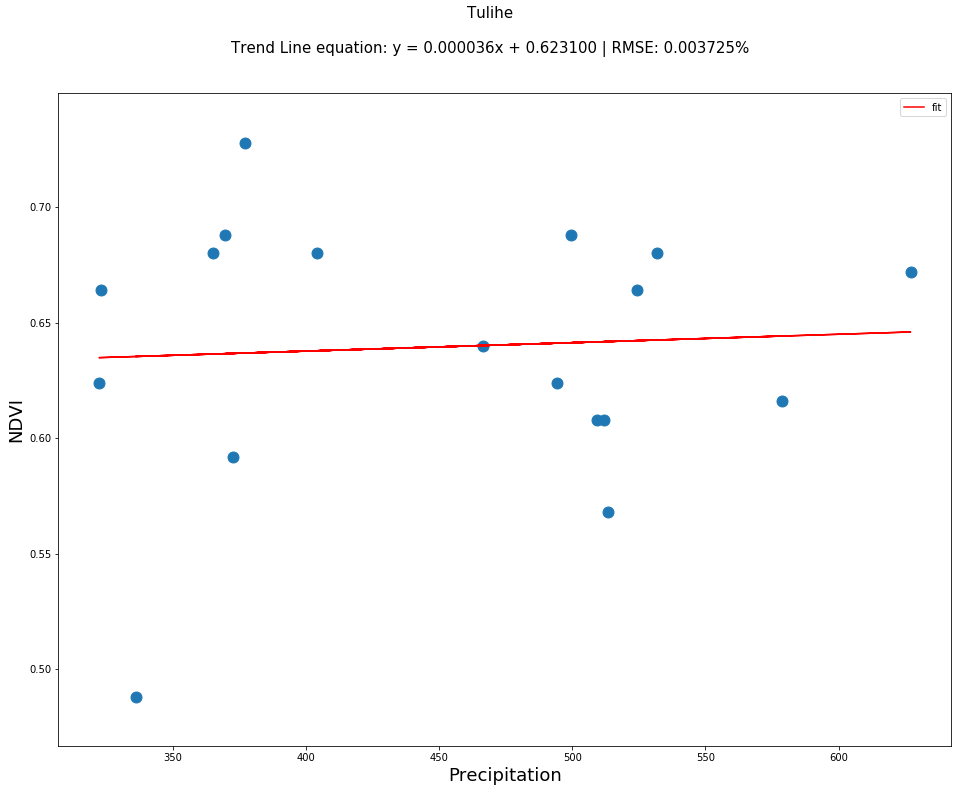

In [88]:
scatter_ndvi_precip(create_station_df(df, 'Tulihe'), 'Tulihe')

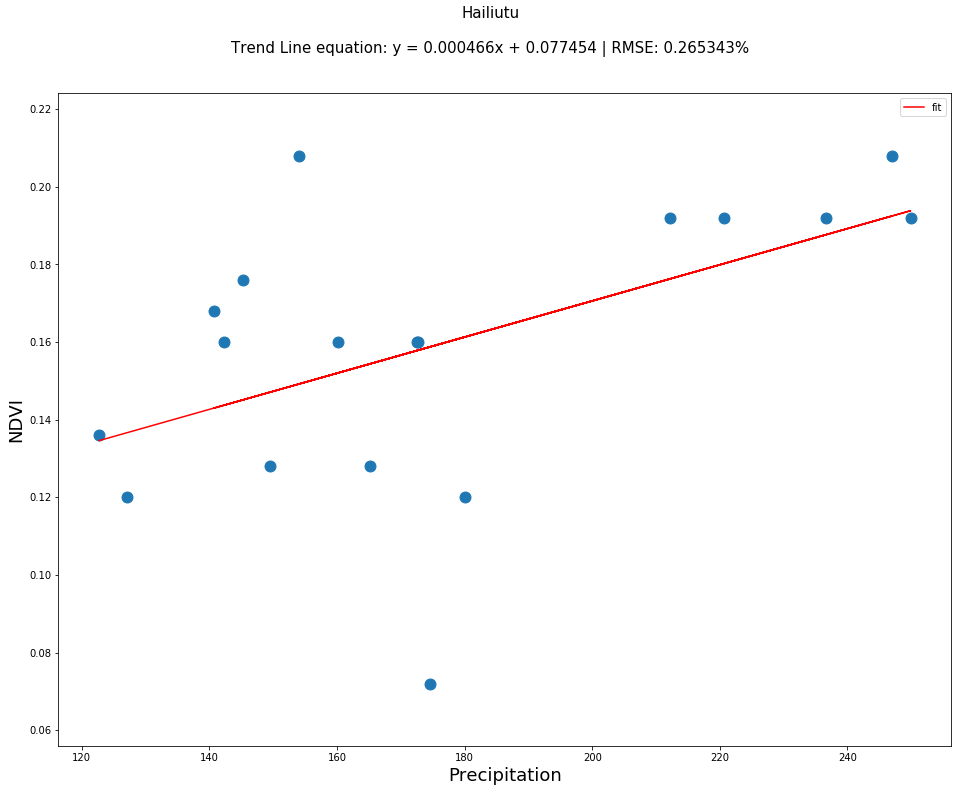

In [89]:
scatter_ndvi_precip(create_station_df(df, 'Hailiutu'), 'Hailiutu')

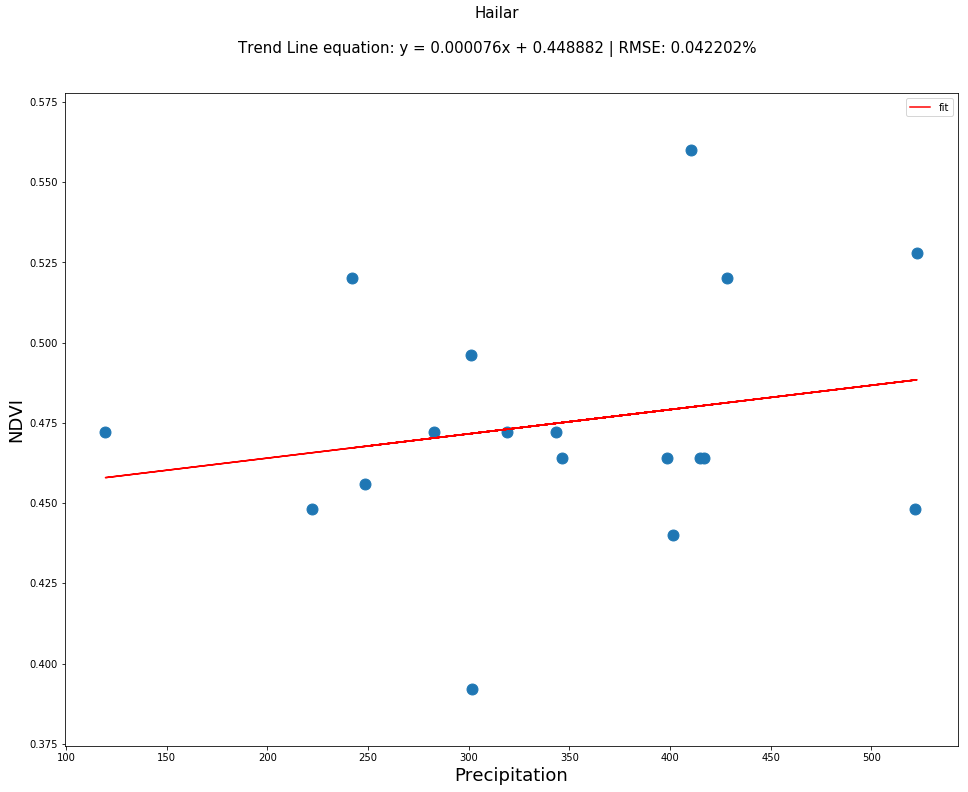

In [90]:
scatter_ndvi_precip(create_station_df(df, 'Hailar'), 'Hailar')

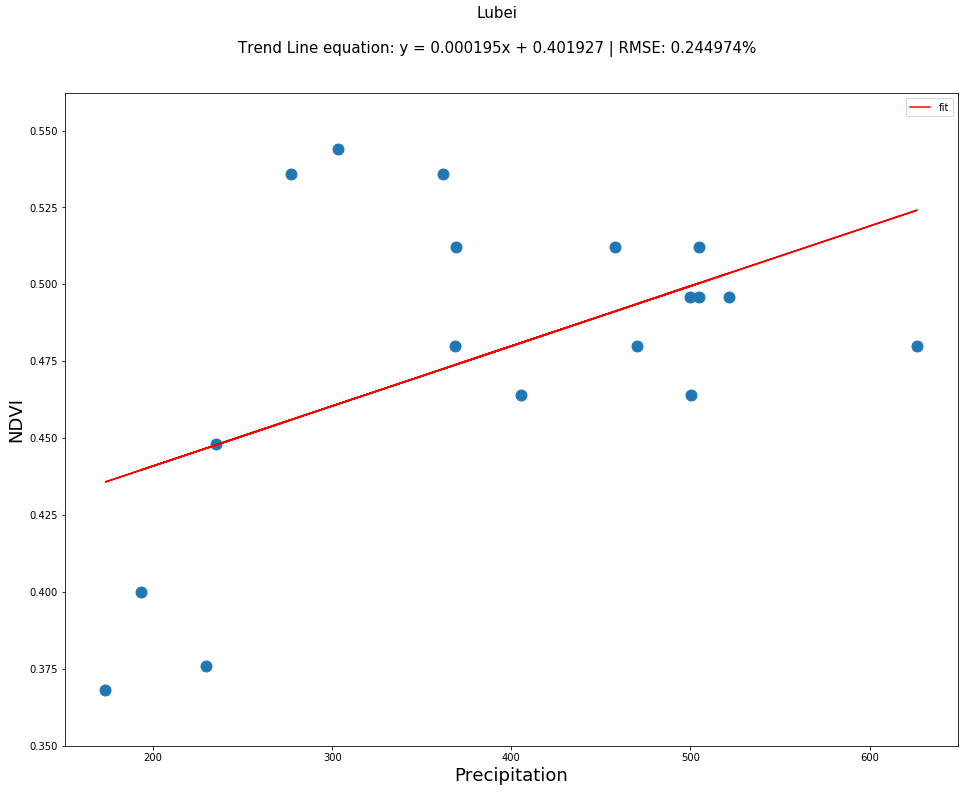

In [91]:
scatter_ndvi_precip(create_station_df(df, 'Lubei'), 'Lubei')

## Chosen stations

* Bayanmaodao
* Hohhot
* Xilinhaote
* Kulun
* Hailar

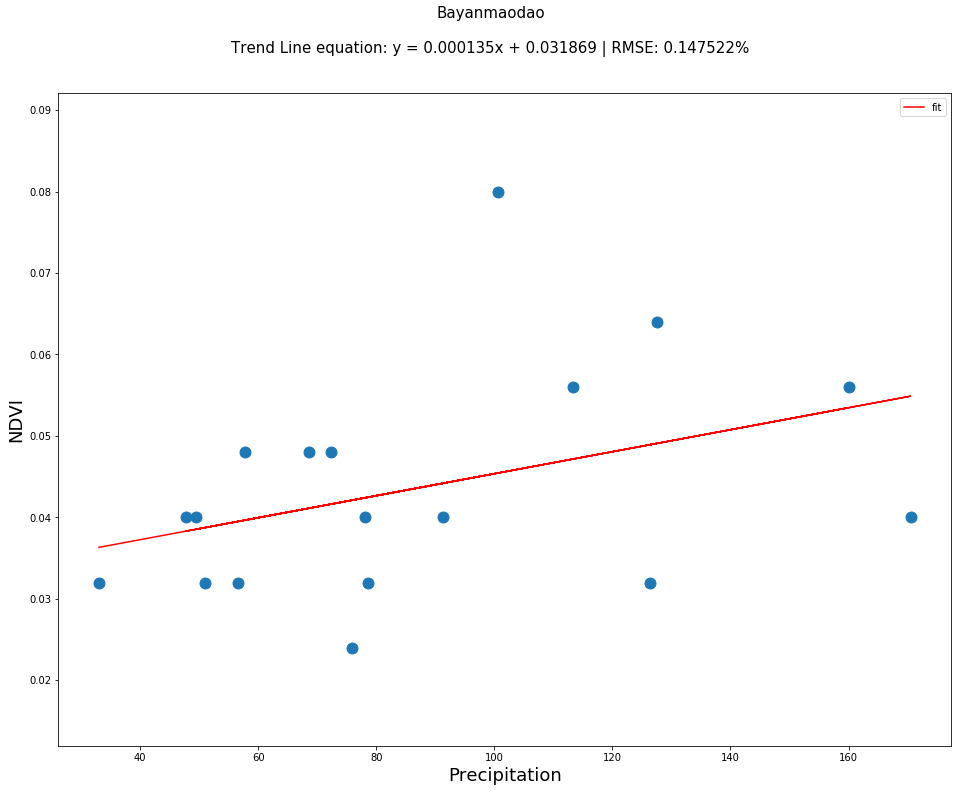

In [92]:
scatter_ndvi_precip(create_station_df(df, 'Bayanmaodao'), 'Bayanmaodao')

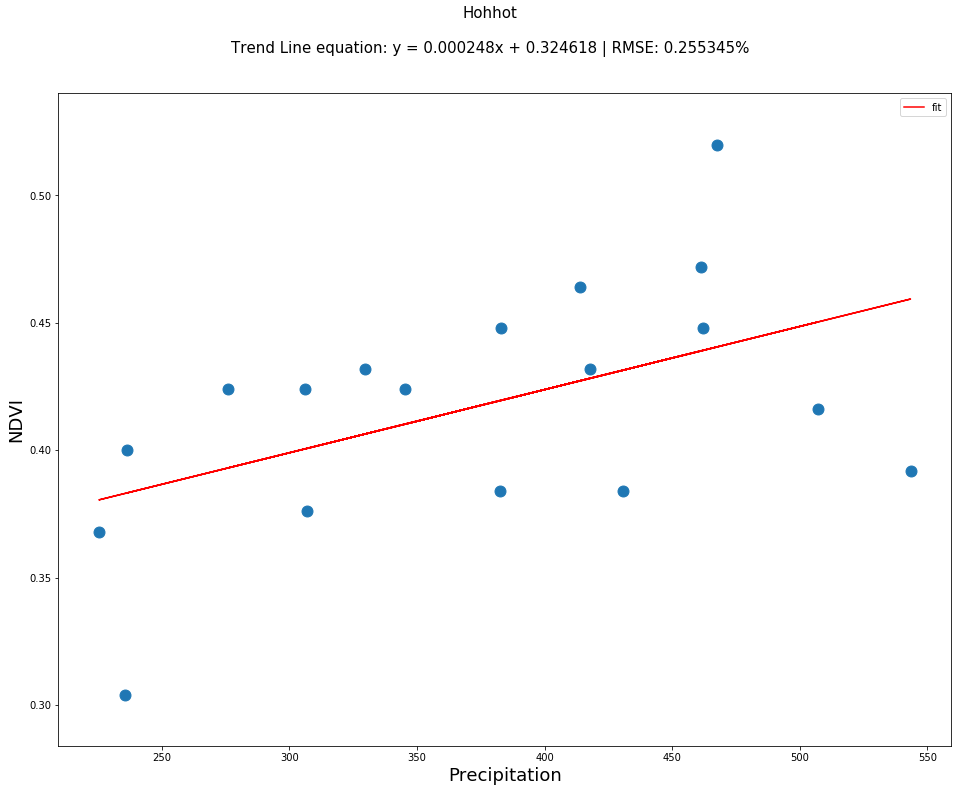

In [93]:
scatter_ndvi_precip(create_station_df(df, 'Hohhot'), 'Hohhot')

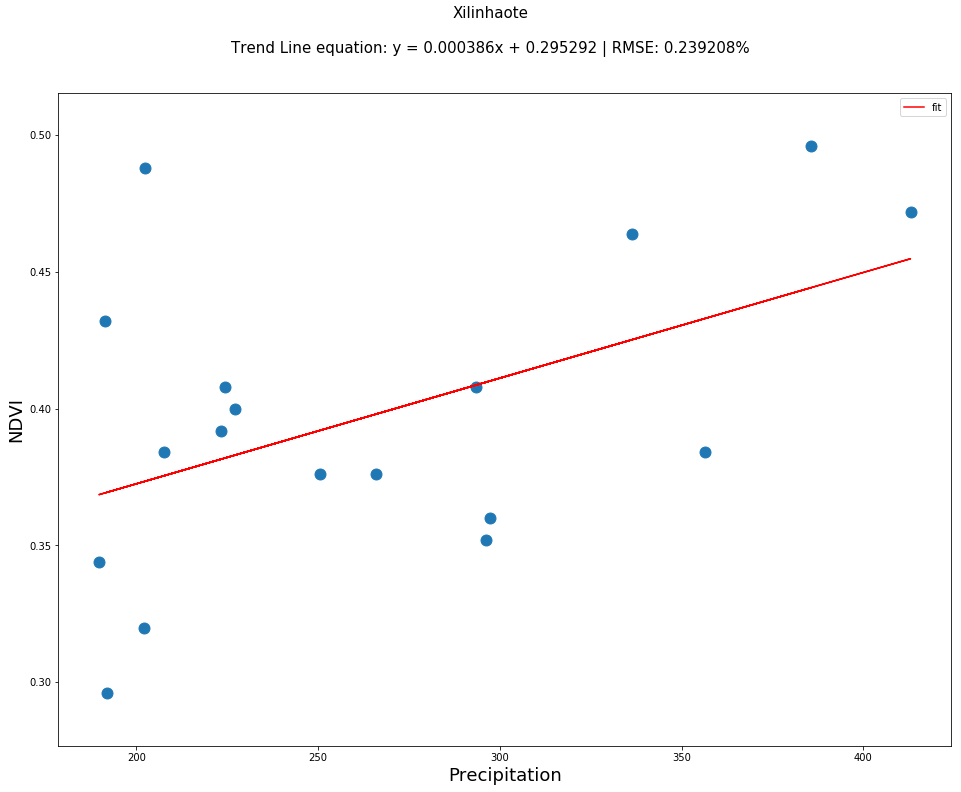

In [94]:
scatter_ndvi_precip(create_station_df(df, 'Xilinhaote'), 'Xilinhaote')

## For good measure: let's do them all!

In [95]:
df.station_na.values

array(['Tulihe', 'Hailar', 'Boketu', 'Keerqingyouyiqianqi',
       'Dongwuzhumuqingqi', 'Bayanmaodao', 'Erlianhaote', 'Abagaqi',
       'Zhourihe', 'Hailiutu', 'Beilingmiao', 'Huade', 'Hohhot',
       'Jilantai', 'Ketuokeqi', 'Wanggaimiao', 'Lubei', 'Lindong',
       'Xilinhaote', 'Linxi', 'Tongliao', 'Duolun', 'Chifeng', 'Ganjig'],
      dtype=object)

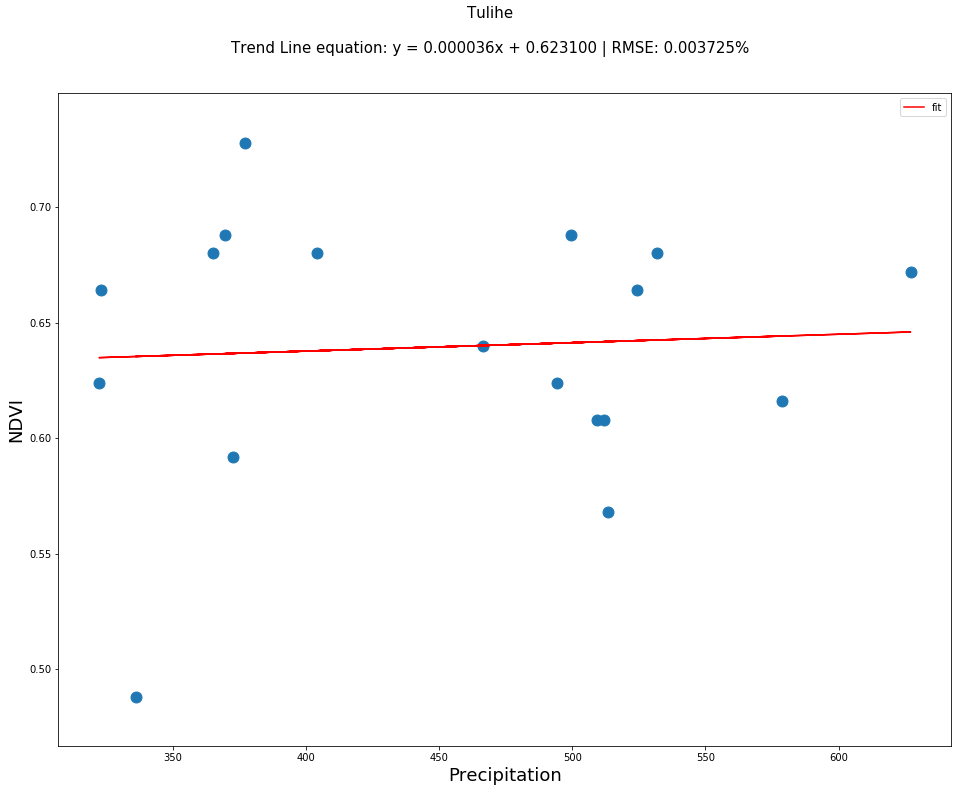

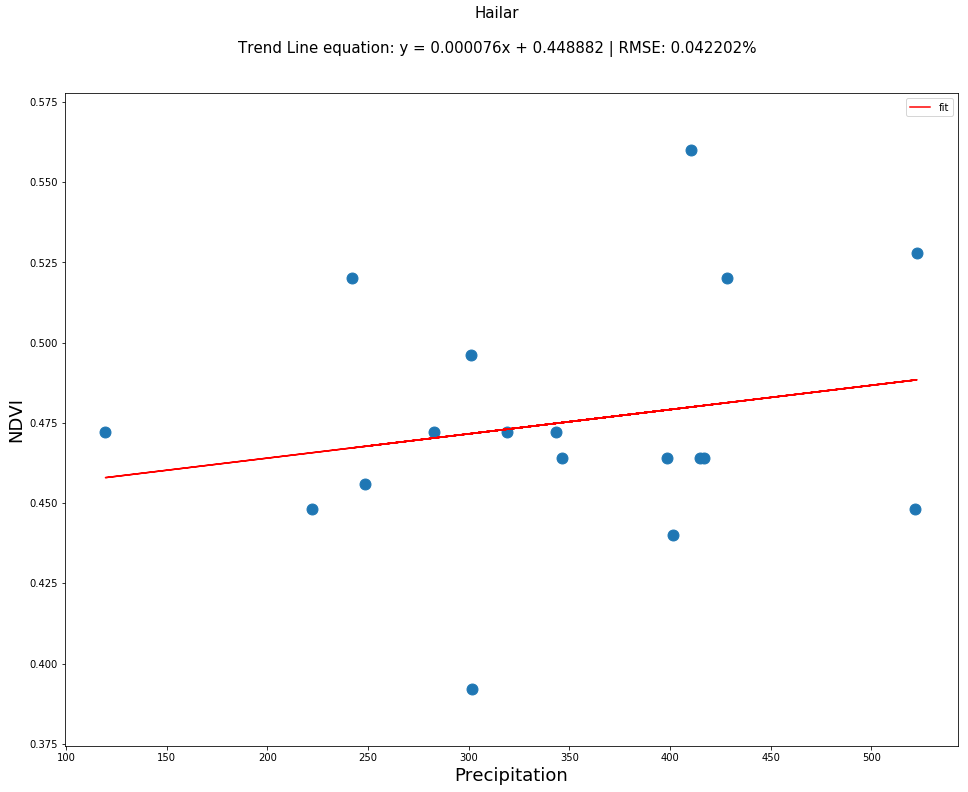

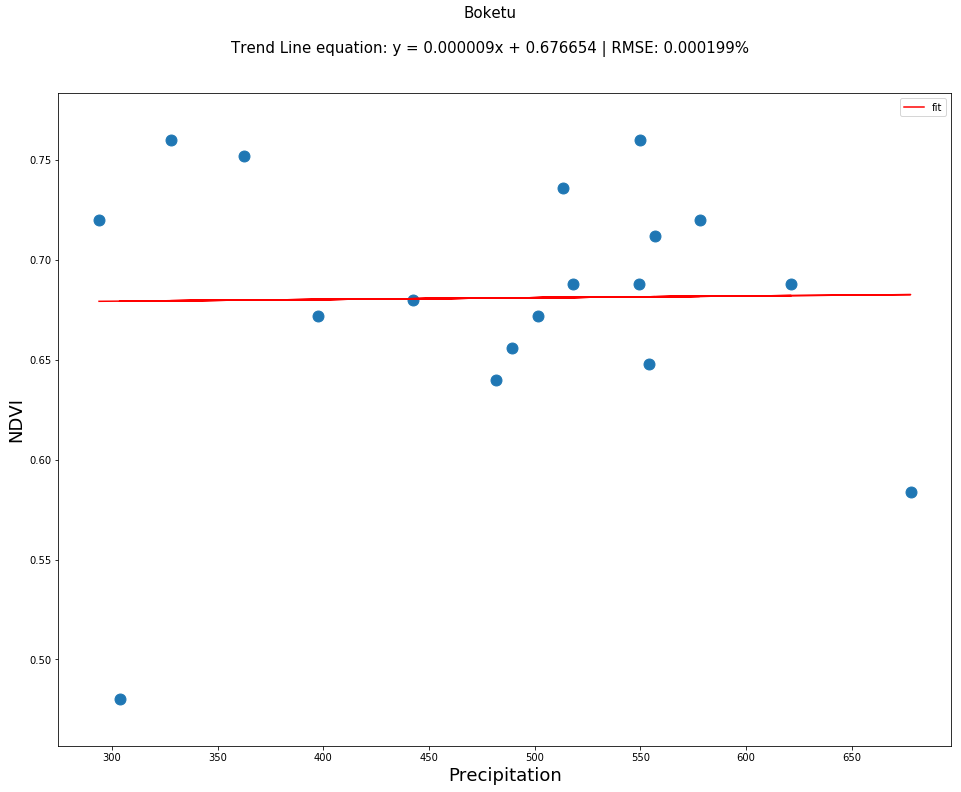

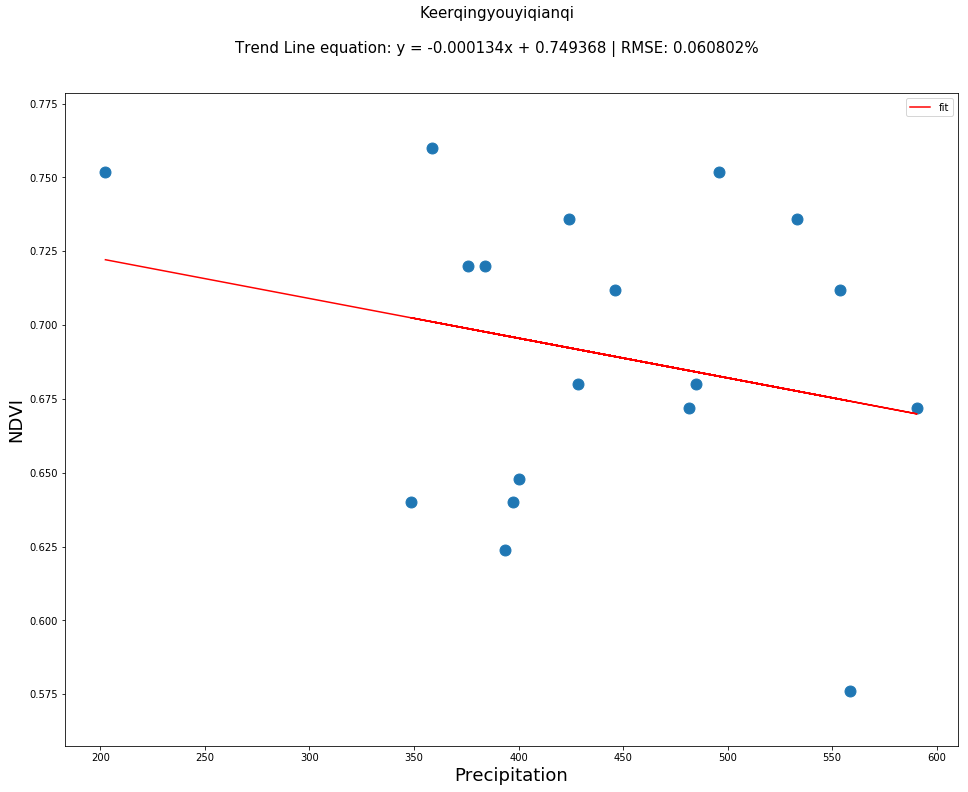

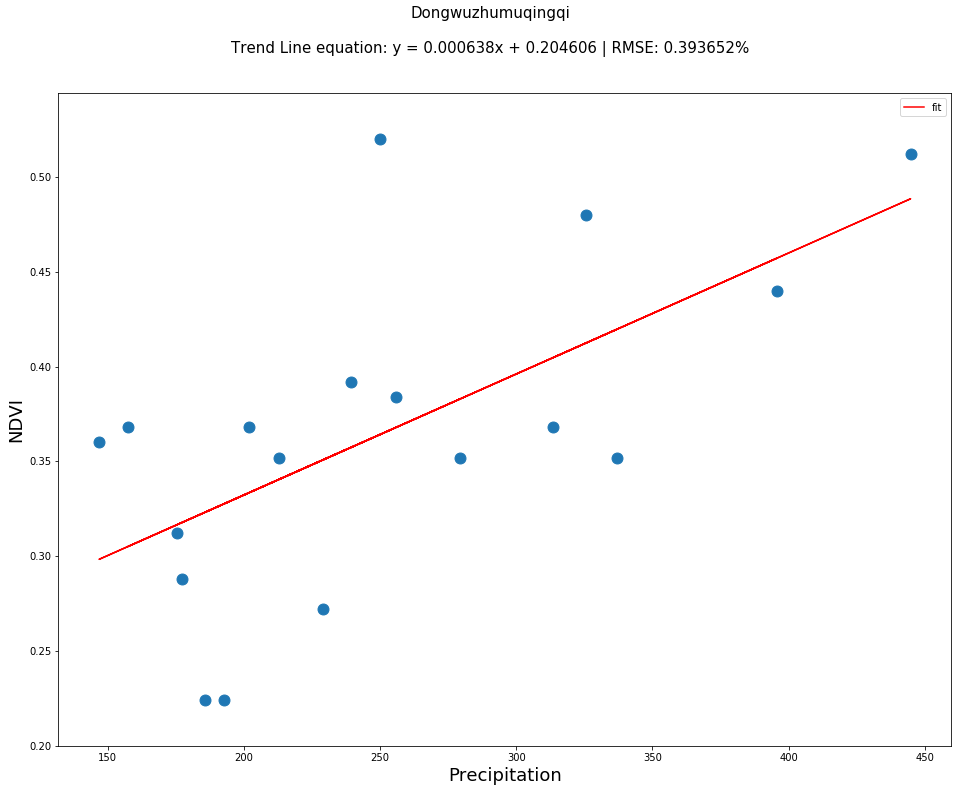

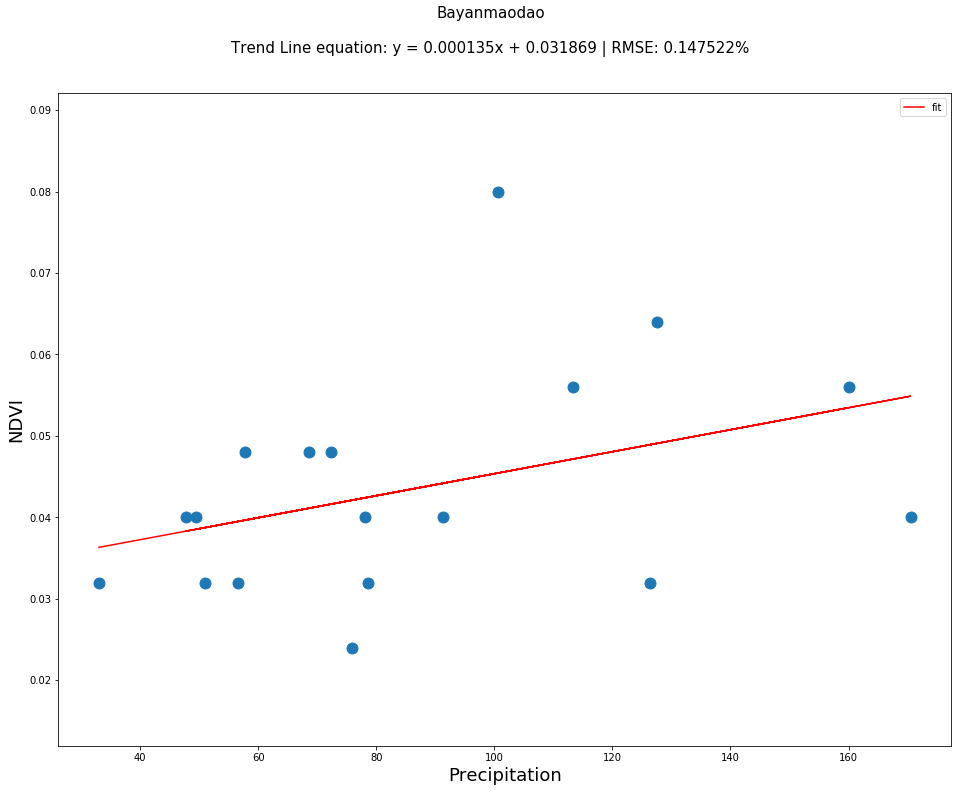

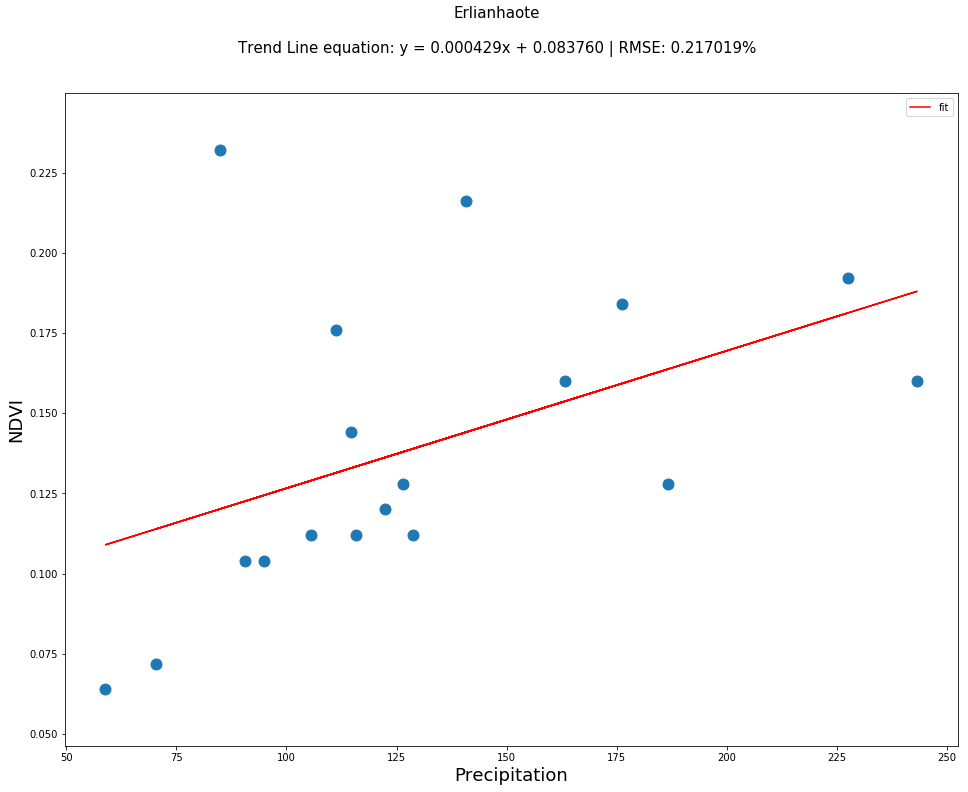

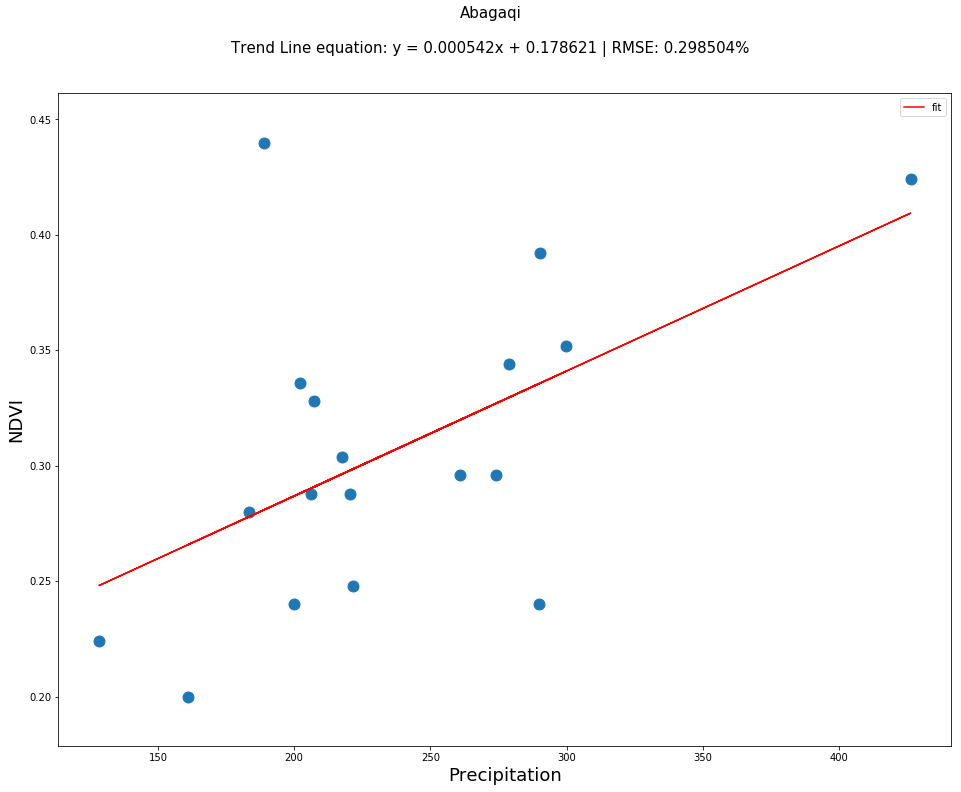

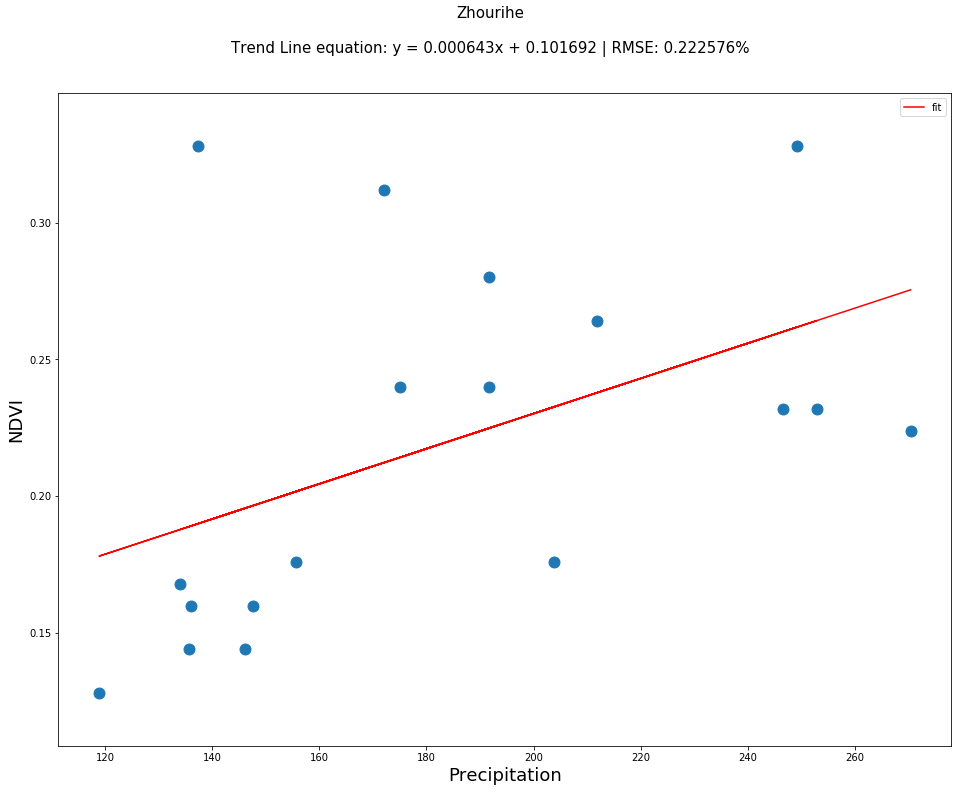

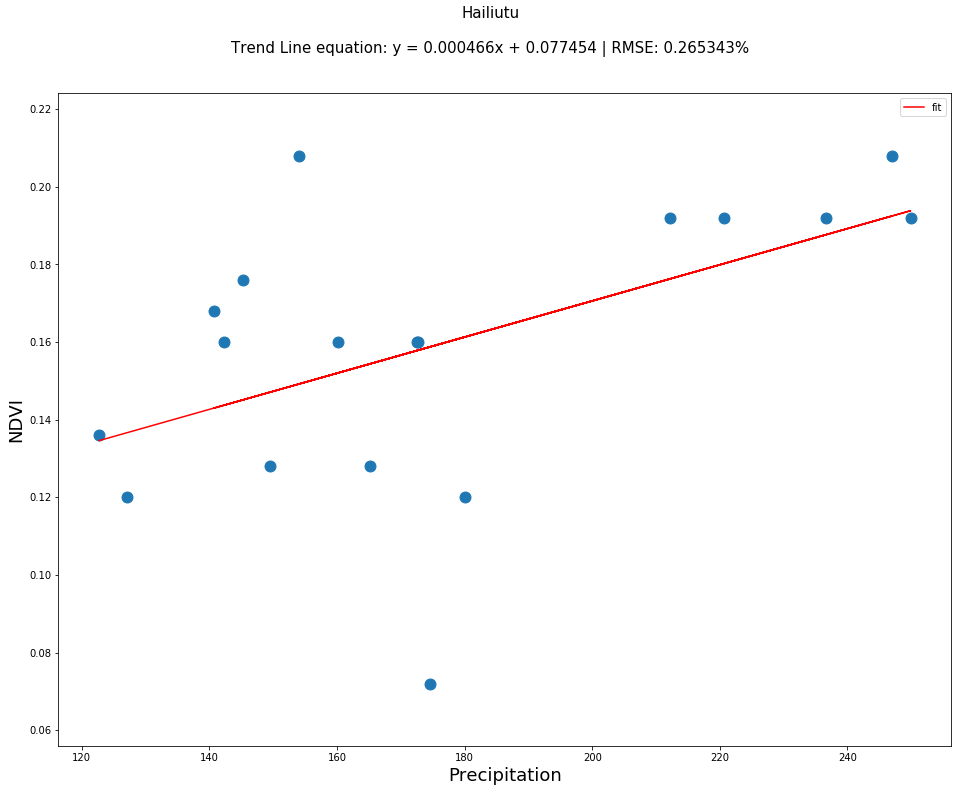

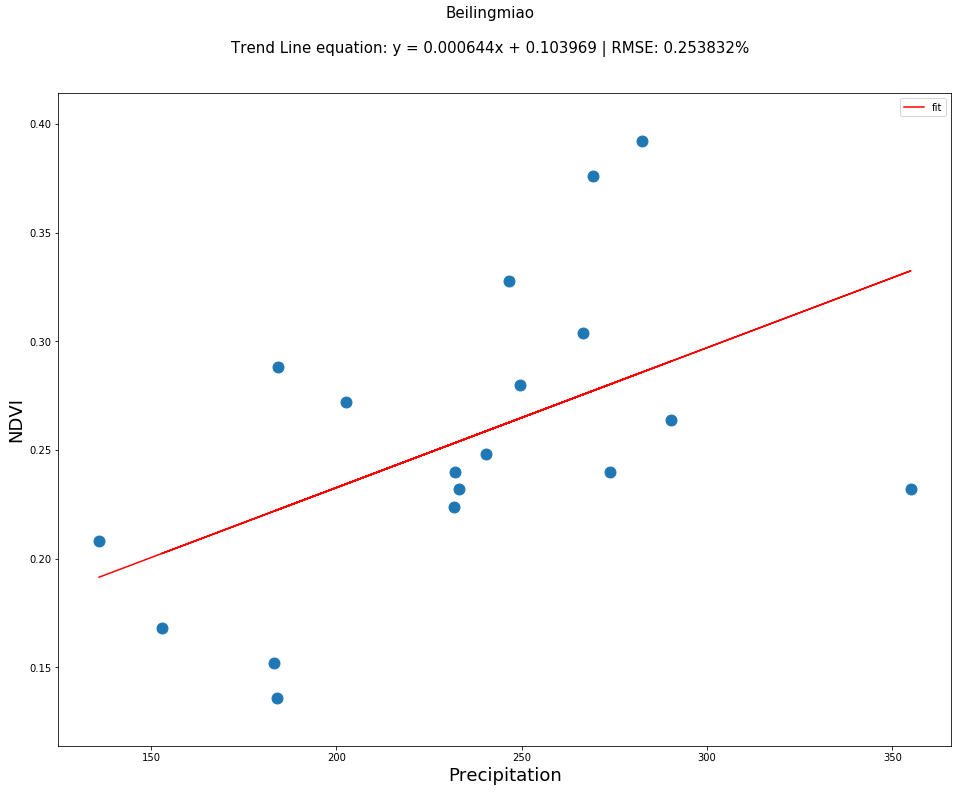

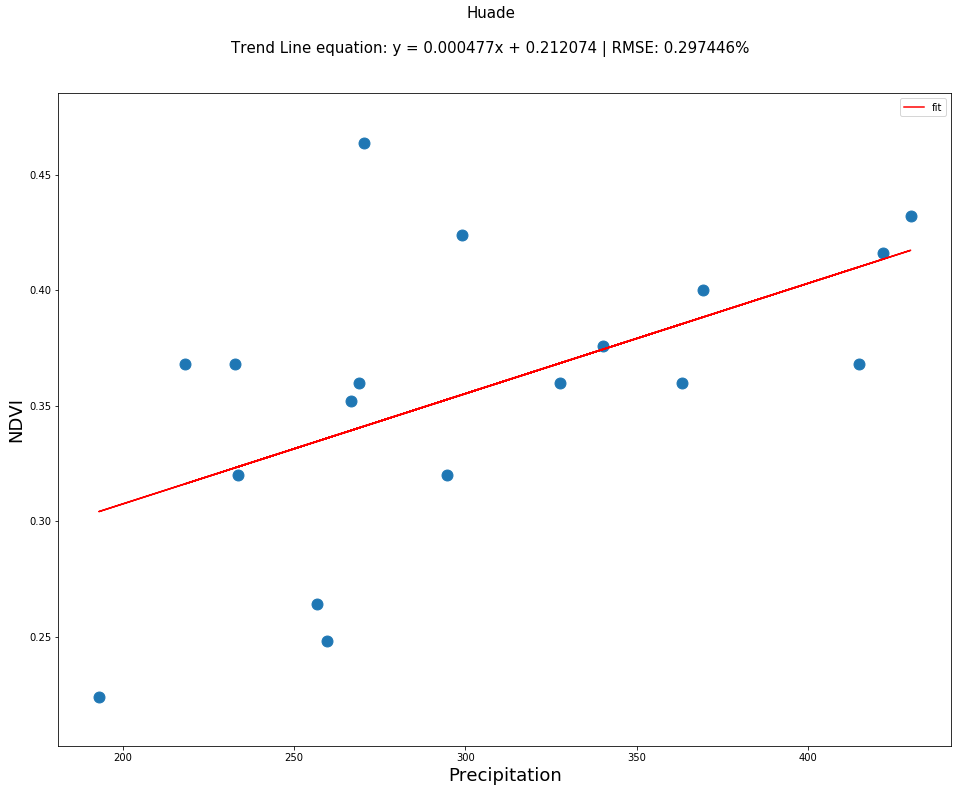

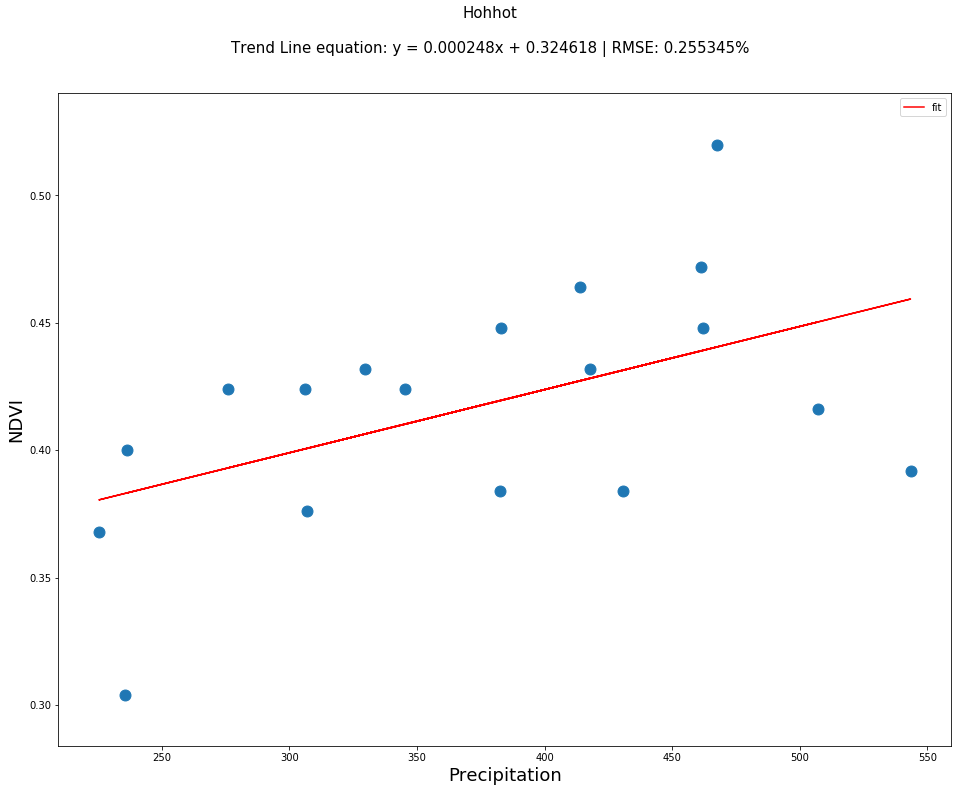

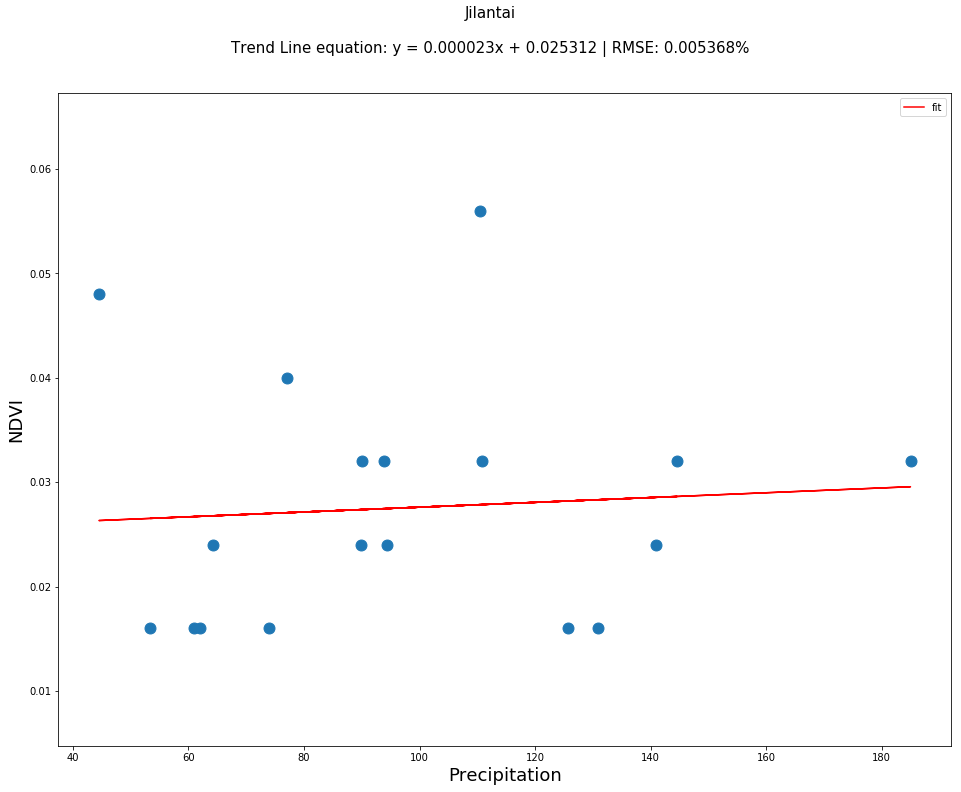

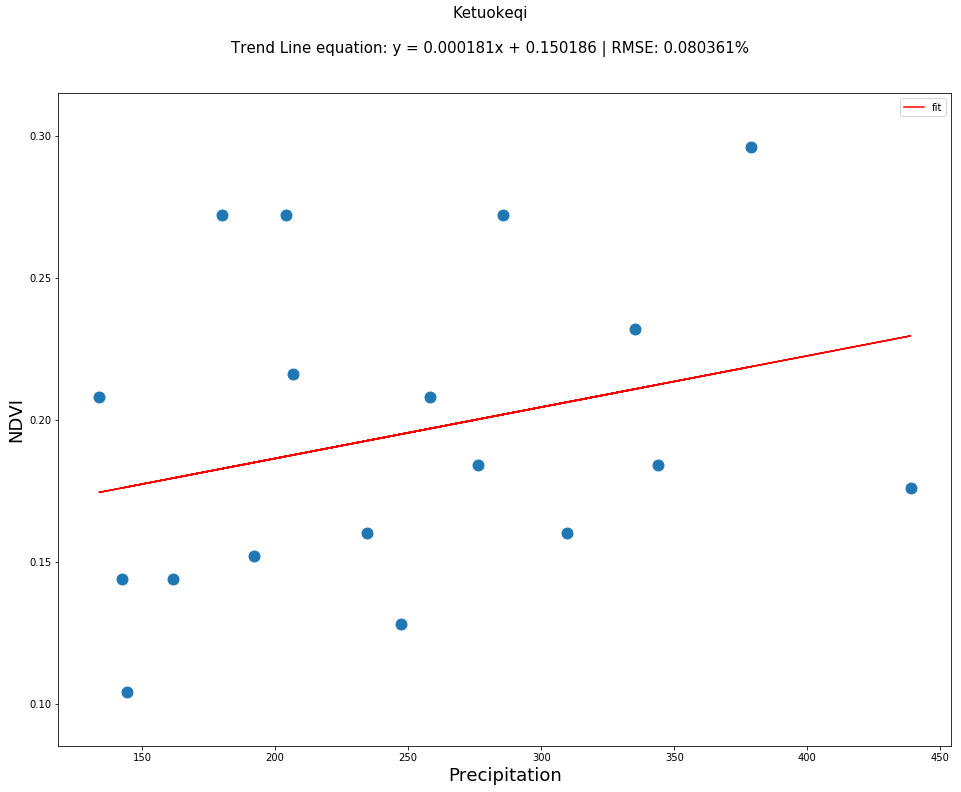

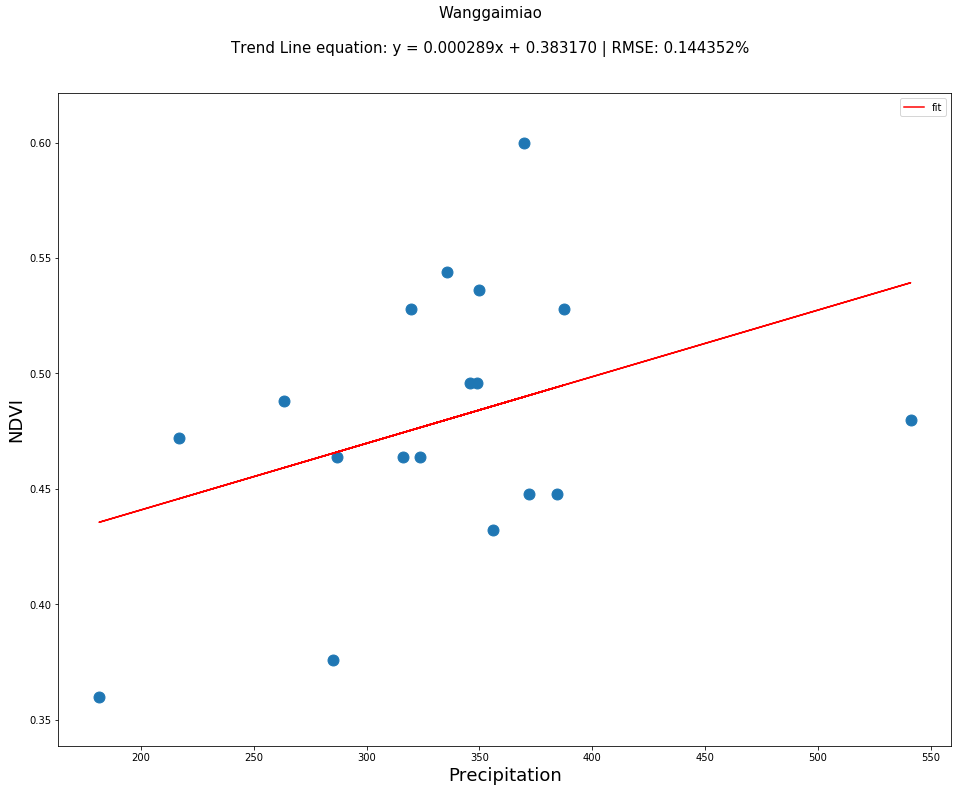

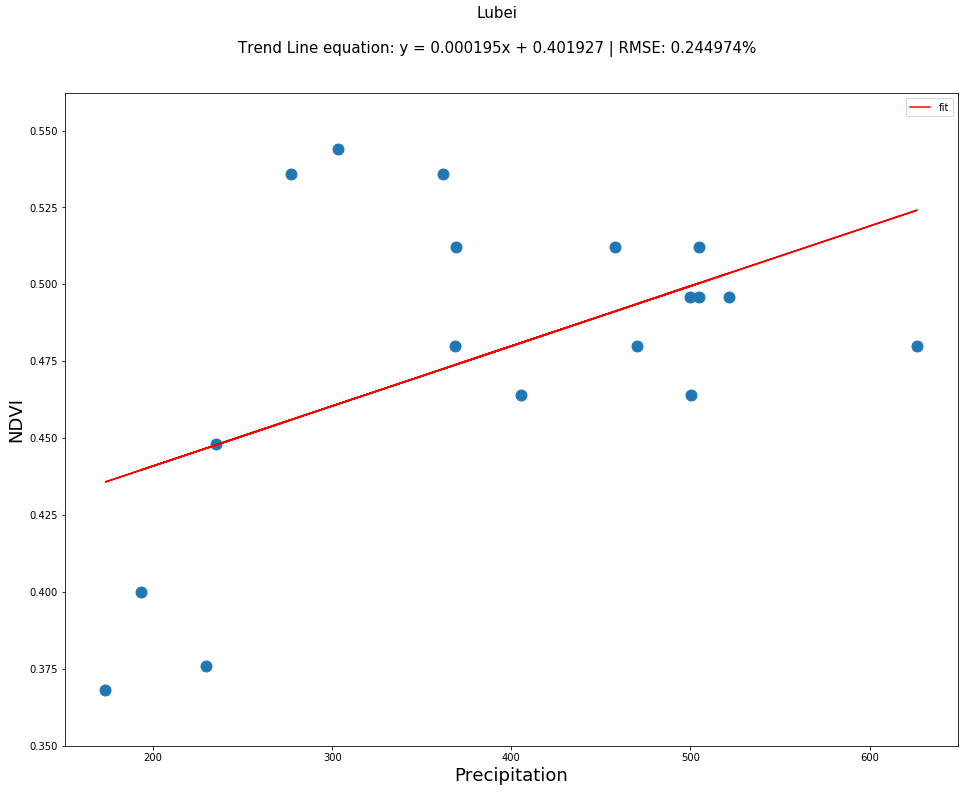

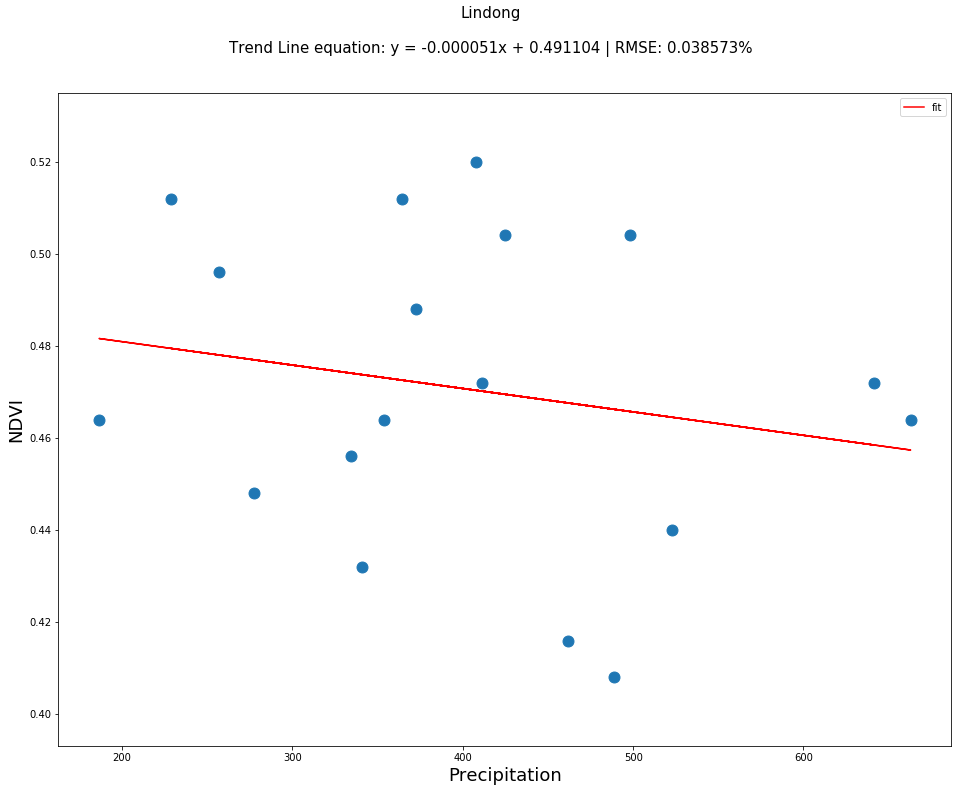

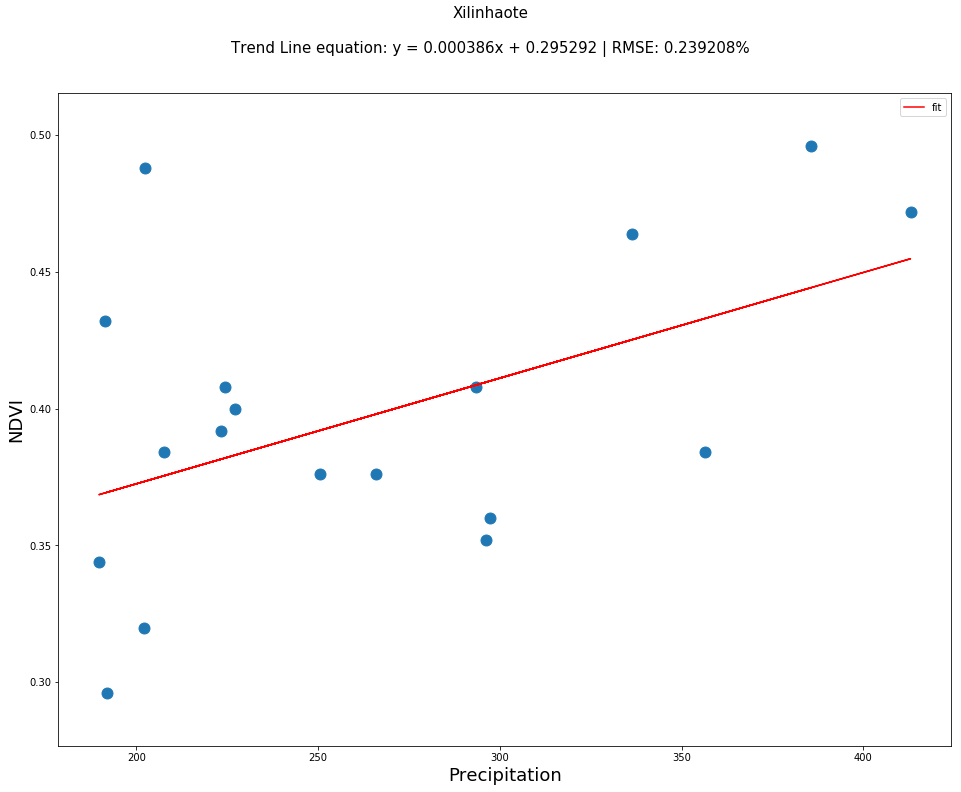

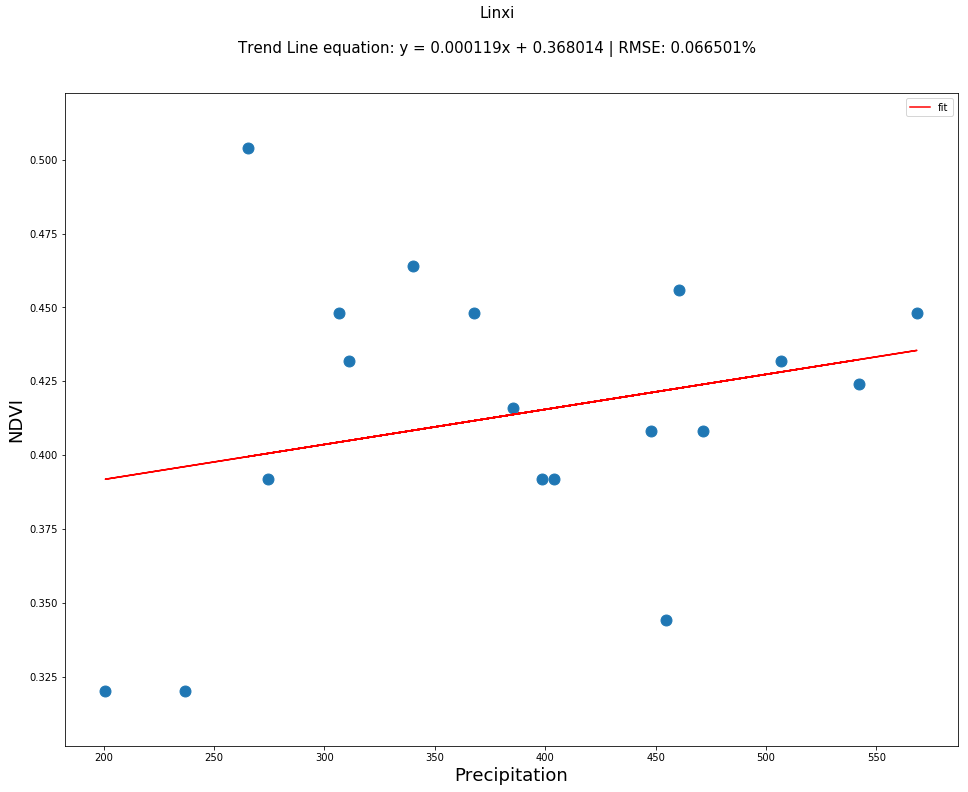

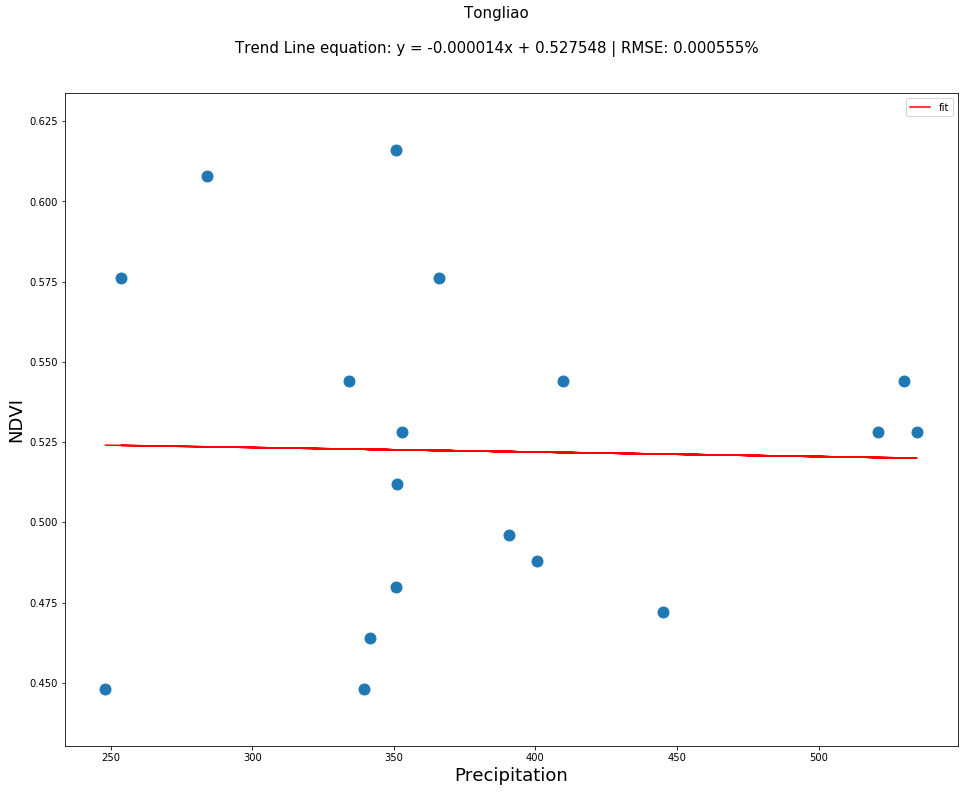

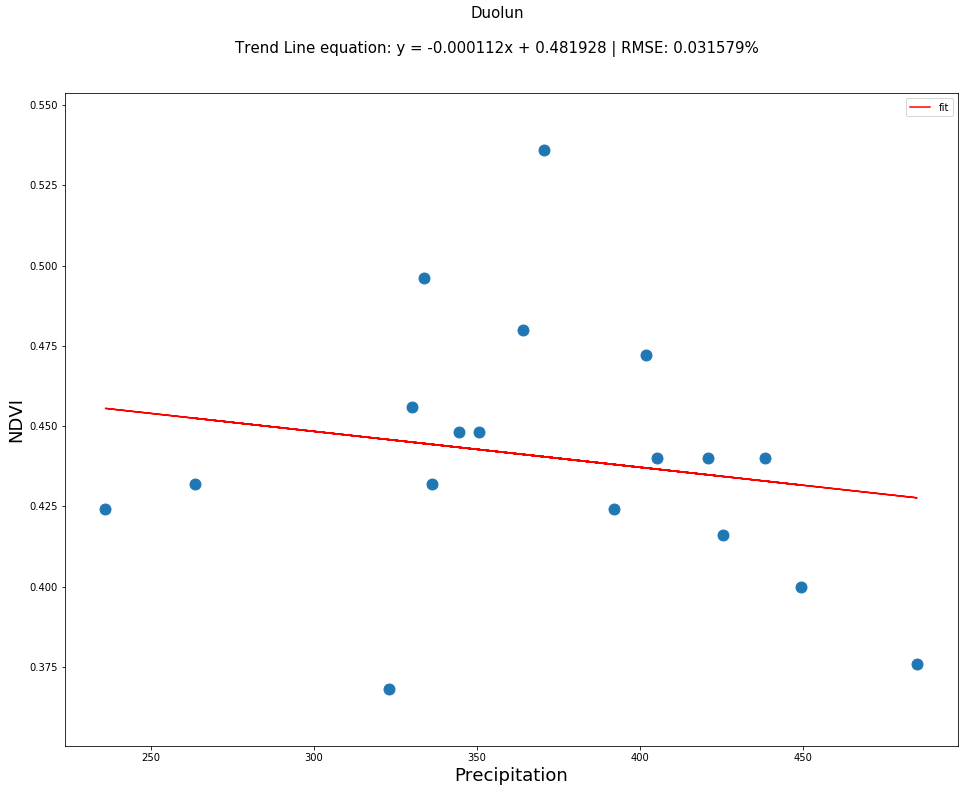

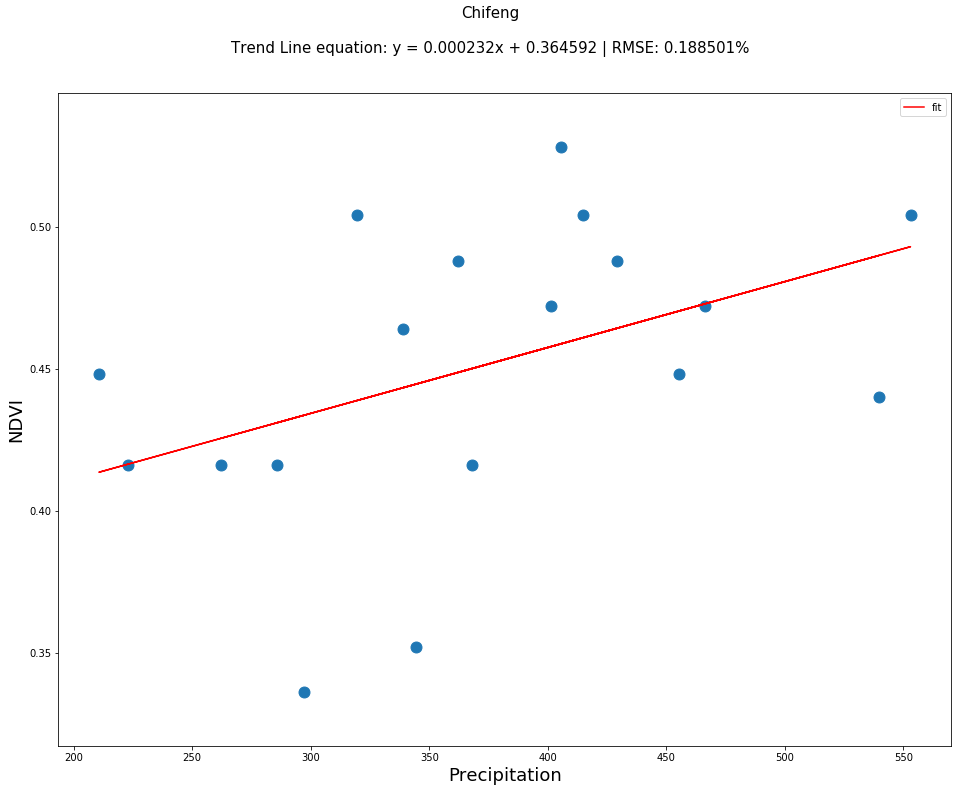

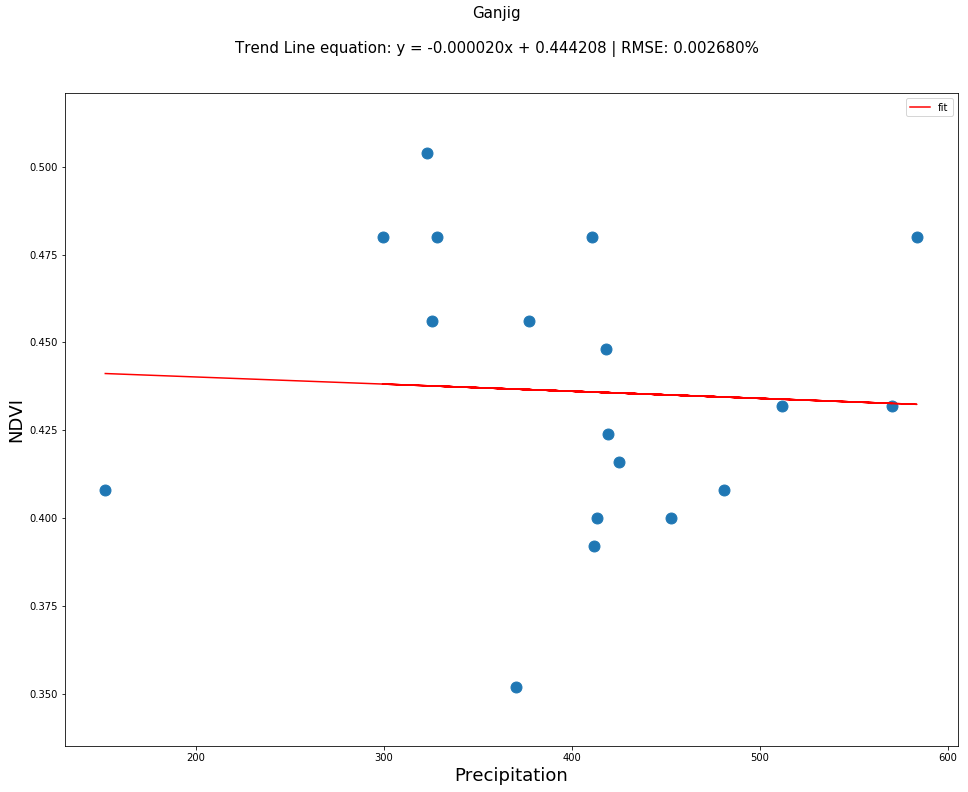

In [96]:
for station in df.station_na.values:
    scatter_ndvi_precip(create_station_df(df, station), station)

# Create a table for stats

In [113]:
stats_df = pd.DataFrame(columns=['station_na', 'slope', 'intercept', 'r2'])

In [101]:
stats_df

,station_na,slope,intercept,r2


In [110]:
def get_stats(station_df, station_name):
    global stats_df
    # creating the OLS regression fit
    model = sm.formula.ols(formula='NDVI ~ Precipitation', data=station_df)
    res = model.fit()
    r2, d, k = res.rsquared, res.params[0], res.params[1]
    s_dict = {'station_na': [station_name], 'slope': [k], 'intercept': [d], 'r2': [r2]}
    s_df = pd.DataFrame.from_dict(s_dict)
    stats_df = stats_df.append(s_df)

In [114]:
for station in df.station_na.values:
    s_df = get_stats(create_station_df(df, station), station)

In [115]:
stats_df

,station_na,slope,intercept,r2
0,Tulihe,0.000036,0.623100,0.003725
0,Hailar,0.000076,0.448882,0.042202
0,Boketu,0.000009,0.676654,0.000199
0,Keerqingyouyiqianqi,-0.000134,0.749368,0.060802
0,Dongwuzhumuqingqi,0.000638,0.204606,0.393652
0,Bayanmaodao,0.000135,0.031869,0.147522
0,Erlianhaote,0.000429,0.083760,0.217019
0,Abagaqi,0.000542,0.178621,0.298504
0,Zhourihe,0.000643,0.101692,0.222576
0,Hailiutu,0.000466,0.077454,0.265343


In [116]:
stats_df.slope = stats_df.slope * 100

In [119]:
stats_df.slope = stats_df.slope / 10

In [120]:
stats_df

,station_na,slope,intercept,r2
0,Tulihe,0.000364,0.623100,0.003725
0,Hailar,0.000756,0.448882,0.042202
0,Boketu,0.000087,0.676654,0.000199
0,Keerqingyouyiqianqi,-0.001345,0.749368,0.060802
0,Dongwuzhumuqingqi,0.006383,0.204606,0.393652
0,Bayanmaodao,0.001350,0.031869,0.147522
0,Erlianhaote,0.004285,0.083760,0.217019
0,Abagaqi,0.005415,0.178621,0.298504
0,Zhourihe,0.006426,0.101692,0.222576
0,Hailiutu,0.004657,0.077454,0.265343


In [129]:
stats_df.reset_index(inplace=True)

In [131]:
stats_df.drop('index', axis=1)

,station_na,slope,intercept,r2
0,Tulihe,0.000364,0.623100,0.003725
1,Hailar,0.000756,0.448882,0.042202
2,Boketu,0.000087,0.676654,0.000199
3,Keerqingyouyiqianqi,-0.001345,0.749368,0.060802
4,Dongwuzhumuqingqi,0.006383,0.204606,0.393652
5,Bayanmaodao,0.001350,0.031869,0.147522
6,Erlianhaote,0.004285,0.083760,0.217019
7,Abagaqi,0.005415,0.178621,0.298504
8,Zhourihe,0.006426,0.101692,0.222576
9,Hailiutu,0.004657,0.077454,0.265343


In [132]:
stats_df.to_csv('station_stats.csv')